In [1]:
# Standard data science libraries
# Used for dataframes
import pandas as pd
# Used for doing math
import numpy as np
# Used for visualization
import matplotlib.pyplot as plt

# Making the plot show within our notebook
%matplotlib inline

# Allowing us to set the plot size
import pylab
pylab.rcParams['figure.figsize'] = (10, 10)

In [2]:
# Importing the csv
climate_essay_df = pd.read_csv('data_noID.csv')

# How big is this dataframe
climate_essay_df.shape

(1793, 104)

In [3]:
subsetted_df = climate_essay_df[climate_essay_df['trt1'] == 1]
subsetted_df = subsetted_df[['trt1', 'don', 'essay']]
subsetted_df = subsetted_df.reset_index(drop = True)
subsetted_df.shape

(589, 3)

In [4]:
subsetted_df['big_donator'] = (subsetted_df['don'] > 8.5)
subsetted_df['big_donator'] = subsetted_df['big_donator'].astype(int)
subsetted_df.head()

,trt1,don,essay,big_donator
0,1,15.0,"Dear Adelyn, \n Today is January 7, 2015. I kn...",1
1,1,0.0,To whom it may concern in 2050:\n\nThis is 201...,0
2,1,19.0,"Dear son,\n This is your mother from 2015 w...",1
3,1,15.0,"Dear J-Swag,\n I want you to know how much I l...",1
4,1,0.0,"Dear Kailey,\nYou will be reading this in the ...",0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
word_counter = CountVectorizer()

essays = subsetted_df['essay'].values

bag_of_words = word_counter.fit_transform(essays)

In [7]:
from sklearn.manifold import TSNE

In [8]:
dim_reduction = TSNE()
tSNE_transformed = dim_reduction.fit_transform(X = bag_of_words.toarray())
tSNE_transformed.shape

(589, 2)

In [9]:
from sklearn.svm import SVC

In [10]:
svm_model = SVC()

Ys = subsetted_df['big_donator'].values

svm_model.fit(X = tSNE_transformed,
              y = Ys)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

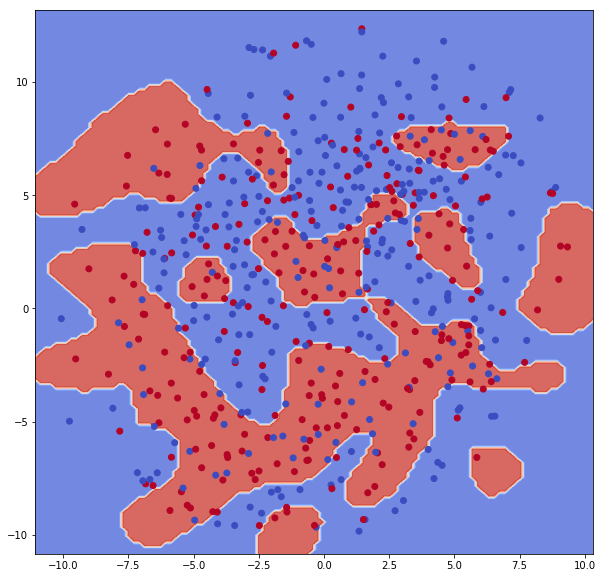

In [11]:
h = 0.2
x_min, x_max = tSNE_transformed[:,0].min() - 1, tSNE_transformed[:, 0].max() + 1
y_min, y_max = tSNE_transformed[:,1].min() - 1, tSNE_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

# create decision boundary plot
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(tSNE_transformed[:,0],tSNE_transformed[:,1],c=Ys, cmap = plt.cm.coolwarm)
plt.show()

In [12]:
predicted_Ys = svm_model.predict(tSNE_transformed)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
accuracy_score(Ys, predicted_Ys)

0.6960950764006791

In [15]:
confusion_matrix(Ys, predicted_Ys)

array([[229,  75],
       [104, 181]])